<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercises</a></span><ul class="toc-item"><li><span><a href="#AVERAGE.-Create-a-bar-chart-of-top-10-countries-in-terms-of-%-of-females-with-debit-card." data-toc-modified-id="AVERAGE.-Create-a-bar-chart-of-top-10-countries-in-terms-of-%-of-females-with-debit-card.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>AVERAGE. Create a bar chart of top 10 countries in terms of % of females with debit card.</a></span></li><li><span><a href="#DIFFICULT.-Create-a-bubble-map-to-show-%-of-females-with-debit-card-per-country.-Create-another-showing-%-of-males-with-debit-card-per-country." data-toc-modified-id="DIFFICULT.-Create-a-bubble-map-to-show-%-of-females-with-debit-card-per-country.-Create-another-showing-%-of-males-with-debit-card-per-country.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DIFFICULT. Create a bubble map to show % of females with debit card per country. Create another showing % of males with debit card per country.</a></span></li></ul></li></ul></div>

# Exercises

In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

## AVERAGE. Create a bar chart of top 10 countries in terms of % of females with debit card.

In [3]:
data["female_with_debit_card"] = data.apply(
    lambda x: 1 if x["female"] == 2 and x["fin2"] == 1 else None, 
    axis=1)

In [4]:
data[["female", "fin2", "female_with_debit_card"]]

,female,fin2,female_with_debit_card
0,1,2,NaN
1,2,2,NaN
2,2,2,NaN
3,2,2,NaN
4,1,2,NaN
...,...,...,...
154918,2,2,NaN
154919,1,1,NaN
154920,1,1,NaN
154921,1,1,NaN


In [18]:
grouped_data = data[data["female"] == 2]
grouped_data = grouped_data.groupby(["economy"])["wpid_random", "female_with_debit_card"].count()
grouped_data = grouped_data.reset_index()
grouped_data

C:\Users\emers\AppData\Local\Temp\ipykernel_41180\450345796.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,economy,wpid_random,female_with_debit_card
0,Afghanistan,500,7
1,Albania,601,152
2,Algeria,504,83
3,Argentina,567,267
4,Armenia,577,129
...,...,...,...
139,"Venezuela, RB",618,416
140,Vietnam,575,165
141,West Bank and Gaza,598,73
142,Zambia,587,105


In [20]:
grouped_data["% of female with debit card"] = round(grouped_data["female_with_debit_card"] *100 / grouped_data["wpid_random"],2)
top_10 = grouped_data.sort_values("% of female with debit card", ascending=False).head(10).reset_index(drop=True)
top_10

,economy,wpid_random,female_with_debit_card,% of female with debit card
0,Netherlands,469,466,99.36
1,Norway,500,496,99.20
2,Sweden,518,512,98.84
3,Finland,533,523,98.12
4,Denmark,520,506,97.31
5,New Zealand,593,576,97.13
6,Belgium,519,499,96.15
7,Canada,500,480,96.00
8,Slovenia,540,511,94.63
9,Estonia,506,471,93.08


C:\Users\emers\Eskwelabs\Eskwelabs - DS Cohort 10 Sprint 1 Materials\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



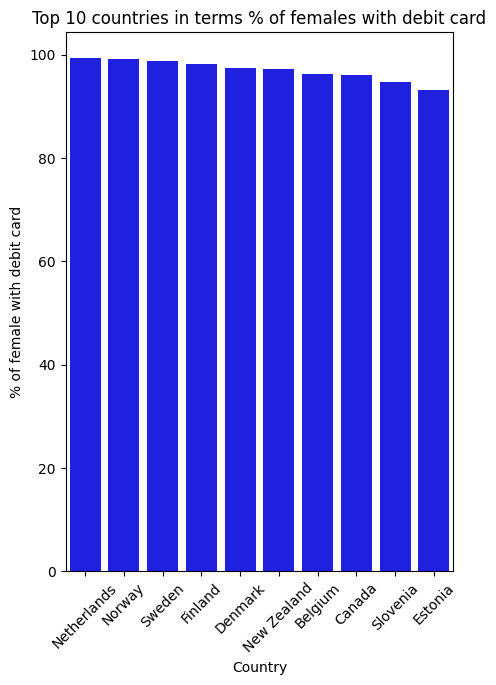

In [30]:
plt.figure(figsize=(5,7))

sns.barplot(
    top_10['economy'],
    top_10['% of female with debit card'],
    color ="blue"
)

plt.title("Top 10 countries in terms % of females with debit card")
plt.xlabel("Country")
plt.ylabel("% of female with debit card")

plt.xticks(rotation=45)

plt.show()

## DIFFICULT. Create a bubble map to show % of females with debit card per country. Create another showing % of males with debit card per country.

Notice any difference?

In [22]:
data["male_with_debit_card"] = data.apply(
    lambda x: 1 if x["female"] == 1 and x["fin2"] == 1 else None, 
    axis=1)

In [23]:
data[["female", "fin2", "female_with_debit_card","male_with_debit_card"]]

,female,fin2,female_with_debit_card,male_with_debit_card
0,1,2,NaN,NaN
1,2,2,NaN,NaN
2,2,2,NaN,NaN
3,2,2,NaN,NaN
4,1,2,NaN,NaN
...,...,...,...,...
154918,2,2,NaN,NaN
154919,1,1,NaN,1.0
154920,1,1,NaN,1.0
154921,1,1,NaN,1.0


In [24]:

grouped_data2 = data.groupby(["economy","economycode"])["wpid_random", "female_with_debit_card", "male_with_debit_card"].count()
grouped_data2 = grouped_data2.reset_index()
grouped_data2

SyntaxError: invalid syntax (2145338485.py, line 1)

In [ ]:
grouped_data2["% of female with debit card"] = round(grouped_data2["female_with_debit_card"] *100 / grouped_data2["wpid_random"],2)

In [25]:
grouped_data2["% of male with debit card"] = round(grouped_data2["male_with_debit_card"] *100 / grouped_data2["wpid_random"],2)

In [26]:
grouped_data2

,economy,economycode,wpid_random,female_with_debit_card,male_with_debit_card,% of female with debit card,% of male with debit card
0,Afghanistan,AFG,1000,7,21,0.70,2.10
1,Albania,ALB,1000,152,126,15.20,12.60
2,Algeria,DZA,1016,83,164,8.17,16.14
3,Argentina,ARG,1000,267,195,26.70,19.50
4,Armenia,ARM,1000,129,135,12.90,13.50
...,...,...,...,...,...,...,...
139,"Venezuela, RB",VEN,1000,416,269,41.60,26.90
140,Vietnam,VNM,1002,165,122,16.47,12.18
141,West Bank and Gaza,PSE,1000,73,116,7.30,11.60
142,Zambia,ZMB,1000,105,127,10.50,12.70


In [27]:
fig = px.scatter_geo(
    grouped_data2,
    locations="economycode",
    color="economy",
    size="% of female with debit card",
    hover_name="economy",
    width=1000,
    height=400)

fig.show()

In [28]:
fig = px.scatter_geo(
    grouped_data2,
    locations="economycode",
    color="economy",
    size="% of male with debit card",
    hover_name="economy")

fig.show()